## 과제 안내

- 아래 설명에 따라 코드의 빈칸을 채워 Tokenizer(문제 1)와 TfidfVectorizer(문제 2) 클래스를 완성하세요.
    - 문제 1, 문제 2 모두 수행해야 합니다.
    - 주어진 조건을 모두 만족해야 합니다.
- 작업한 파일을 하나의 GitHub Repository에 담아서 제출하세요.
    - 파일 형식: `.ipynb`
        - `.ipynb` 파일 하나에 문제 1과 문제 2 작업 결과를 모두 담아 주시기 바랍니다.
    - 링크 제출 전 해당 GitHub Repository가 public으로 설정되어 있는지 확인 바랍니다.
        - private으로 설정 시 제출 확인이 불가합니다.

## 사용 권장 기술

- 사용 언어: Python (필수)
- 외부 라이브러리 사용은 자유이나, output의 type은 문제에 명시된 조건을 따라야 합니다.

In [119]:
import re


class Tokenizer():
  def __init__(self):
    self.word_dict = {'oov': 0}
    self.fit_checker = False
  
  def preprocessing(self, sequences):
    result = []
    '''
    문제 1-1.
    '''
    for sen in sequences:
      sen = sen.lower() # to lower letter
      sen = re.sub("[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]","",sen) # delete special characters
      sen = sen.split(' ') #split by white space
      result.append(sen)
    return result
  
  def fit(self, sequences):
    self.fit_checker = False
    '''
    문제 1-2.
    '''
    tokens = self.preprocessing(sequences)
    for sen in tokens:
      for word in sen:
        if word not in self.word_dict:
            self.word_dict[word] = max(self.word_dict.values()) +1 # 최종 단어장 value보다 1 큰 값으로 매핑
    self.fit_checker = True
  
  def transform(self, sequences):
    result = []
    tokens = self.preprocessing(sequences)
    # print(tokens)
    if self.fit_checker:
      '''
      문제 1-3.
      '''
      for sen in tokens:
        mapped_seq = list(map(lambda x : self.word_dict[x] if x in self.word_dict else self.word_dict['oov'],sen))
        # print(mapped_seq)
        result.append(mapped_seq)
      return result
    else:
      raise Exception("Tokenizer instance is not fitted yet.")
      
  def fit_transform(self, sequences):
    self.fit(sequences)
    result = self.transform(sequences)
    return result

### **문제 1) Tokenizer 생성하기**

**1-1. `preprocessing()`**

텍스트 전처리를 하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장을 토큰화한 결과로, nested list 형태입니다. ex) [['i', 'go', 'to', 'school'], ['i', 'like', 'pizza']]
- 조건 1: 입력된 문장에 대해서 소문자로의 변환과 특수문자 제거를 수행합니다.
- 조건 2: 토큰화는 white space 단위로 수행합니다.

In [120]:
seq = ['I go to school.', 'I LIKE pizza!', 'Love is, never having to say you are sorry...']

tok = Tokenizer()
tok.preprocessing(seq)

[['i', 'go', 'to', 'school'],
 ['i', 'like', 'pizza'],
 ['love', 'is', 'never', 'having', 'to', 'say', 'you', 'are', 'sorry']]

**1-2. `fit()`**

어휘 사전을 구축하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- 조건 1: 위에서 만든 `preprocessing` 함수를 이용하여 각 문장에 대해 토큰화를 수행합니다.
- 조건 2: 각각의 토큰을 정수 인덱싱 하기 위한 어휘 사전(`self.word_dict`)을 생성합니다.
    - 주어진 코드에 있는 `self.word_dict`를 활용합니다.

In [121]:

seq = ['I go to school.', 'I LIKE pizza!', 'Love is, never having to say you are sorry...']

tok.fit(seq)
print(tok.word_dict)
# tok.fit_checker

{'oov': 0, 'i': 1, 'go': 2, 'to': 3, 'school': 4, 'like': 5, 'pizza': 6, 'love': 7, 'is': 8, 'never': 9, 'having': 10, 'say': 11, 'you': 12, 'are': 13, 'sorry': 14}


**1-3. `transform()`**

어휘 사전을 활용하여 입력 문장을 정수 인덱싱하는 함수입니다.

- input: 여러 영어 문장이 포함된 list입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장의 정수 인덱싱으로, nested list 형태입니다. ex) [[1, 2, 3, 4], [1, 5, 6]]
- 조건 1: 어휘 사전(`self.word_dict`)에 없는 단어는 'oov'의 index로 변환합니다.

In [122]:
# fit 했던 sequence와 다른 문장 data로 tokenize 

sequences = ['I love you so much', 'PIZZA is my favorite!!', 'I am sorry. It is my mistake.']

tok.transform(sequences)

[[1, 7, 12, 0, 0], [6, 8, 0, 0], [1, 0, 14, 0, 8, 0, 0]]

In [126]:
from collections import Counter
import numpy as np

class TfidfVectorizer:
  def __init__(self, tokenizer):
    self.tokenizer = tokenizer
    self.fit_checker = False
  
  def fit(self, sequences):
    tokenized = self.tokenizer.fit_transform(sequences)
    '''
    문제 2-1.
    '''
    # calculate df(d,t)
    num_token = set(sum(tokenized,[]))
    dic={}
    for num in num_token:
      cnt=0
      for sen in tokenized:
        if num in set(sen):
          cnt+=1
      dic[num]=cnt

    # calculate idf 
    N=len(sequences)
    result=[]
    for sen in tokenized:
      result.append([np.log(N/(dic[token]+1)) for token in sen])
    self.idf = result
       
    
    
    self.fit_checker = True
    

  def transform(self, sequences):
    if self.fit_checker:
      tokenized = self.tokenizer.transform(sequences)
      '''
      문제 2-2.
      '''
      ## term frequency
      self.tf = [list(map(lambda x : sen.count(x),sen)) for sen in tokenized]


      
      
      # now multipy tf * idf

      self.tfidf_matrix=[]
      for tf,idf in zip(self.tf, self.idf):
        self.tfidf_matrix.append([a*b for a, b in zip(tf,idf)])
      
      # print(self.tf)
      # print(self.idf)
          

      return self.tfidf_matrix
    else:
      raise Exception("TfidfVectorizer instance is not fitted yet.")

  
  def fit_transform(self, sequences):
    self.fit(sequences)
    return self.transform(sequences)

### **문제 2) TfidfVectorizer 생성하기**

**2-1. `fit()`**

입력 문장들을 이용해 IDF 행렬을 만드는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- 조건 1: IDF 행렬은 list 형태입니다.
    - ex) [토큰1에 대한 IDF 값, 토큰2에 대한 IDF 값, .... ]
- 조건 2: IDF 값은 아래 식을 이용해 구합니다.
$$idf(d,t)=log_e(\frac{n}{1+df(d,t)})$$
  - $df(d,t)$ : 단어 t가 포함된 문장 d의 개수
  - $n$ : 입력된 전체 문장 개수

- 조건 3: 입력된 문장의 토큰화에는 문제 1에서 만든 Tokenizer를 사용합니다.

In [127]:
seq = ['I love to go to school.', 'I love pizza, pizza!', 'Love is, never having to say you are sorry...']

tokenizer = Tokenizer()
vectorizer =TfidfVectorizer(tokenizer) # tokenizer 통해 생성
vectorizer.fit(seq)

vectorizer.idf #instance의 attribute로 할당

[[0.0, -0.2876820724517809, 0.0, 0.4054651081081644, 0.0, 0.4054651081081644],
 [0.0, -0.2876820724517809, 0.4054651081081644, 0.4054651081081644],
 [-0.2876820724517809,
  0.4054651081081644,
  0.4054651081081644,
  0.4054651081081644,
  0.0,
  0.4054651081081644,
  0.4054651081081644,
  0.4054651081081644,
  0.4054651081081644]]

**2-2. `transform()`**

입력 문장들을 이용해 TF-IDF 행렬을 만드는 함수입니다.

- input: 여러 영어 문장이 포함된 list입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output : nested list 형태입니다.
    
    ex) [[tf-idf(1, 1), tf-idf(1, 2), tf-idf(1, 3)], [tf-idf(2, 1), tf-idf(2, 2), tf-idf(2, 3)]]
    
    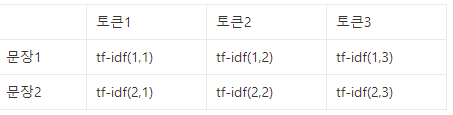
- 조건1 : 입력 문장을 이용해 TF 행렬을 만드세요.
    - $tf(d, t)$ : 문장 d에 단어 t가 나타난 횟수
- 조건2 : 문제 2-1( `fit()`)에서 만든 IDF 행렬과 아래 식을 이용해 TF-IDF 행렬을 만드세요
    
$$tf-idf(d,t) = tf(d,t) \times idf(d,t)$$

In [128]:
vectorizer.transform(seq)

[[0.0, -0.2876820724517809, 0.0, 0.4054651081081644, 0.0, 0.4054651081081644],
 [0.0, -0.2876820724517809, 0.8109302162163288, 0.8109302162163288],
 [-0.2876820724517809,
  0.4054651081081644,
  0.4054651081081644,
  0.4054651081081644,
  0.0,
  0.4054651081081644,
  0.4054651081081644,
  0.4054651081081644,
  0.4054651081081644]]